# ROUND 6

In [157]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [158]:
nums = pd.read_csv('my_data/nums.csv')

y = pd.read_csv('my_data/y.csv')

nums_s = pd.read_csv('my_data/nums_s.csv')
nums_m = pd.read_csv('my_data/nums_m.csv')

cats = pd.read_csv('my_data/cats.csv')
cats = cats.drop(['customer'], axis=1)

dates = pd.read_csv('my_data/dates.csv')

y


,total_claim_amount
0,292.800000
1,744.924331
2,480.000000
3,484.013411
4,707.925645
...,...
10905,1214.400000
10906,273.018929
10907,381.306996
10908,618.288849


In [159]:
from sklearn.preprocessing import OneHotEncoder

def normit(x: str):
    x = x.replace(' ', '_')
    x = x.replace('-', '_')
    return x.lower()


encoder = OneHotEncoder(drop='first').fit(pd.DataFrame(cats))
encoded = encoder.transform(pd.DataFrame(cats)).toarray()
# exclude first colum [1:]
cols = encoder.get_feature_names_out(input_features=cats.columns)
cols = list(map(normit, cols))  

onehot_encoded_cats = pd.DataFrame(encoded, columns=cols)
onehot_encoded_cats

,state_california,state_nevada,state_oregon,state_unknown,state_washington,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,...,sales_channel_call_center,sales_channel_web,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two_door_car,vehicle_size_medsize,vehicle_size_small,vehicle_type_b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [160]:
# working with the minmax data

X = pd.concat((nums_m, onehot_encoded_cats), axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_california,state_nevada,state_oregon,...,sales_channel_call_center,sales_channel_web,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two_door_car,vehicle_size_medsize,vehicle_size_small,vehicle_type_b
0,-0.466105,0.345635,-0.934819,-0.698755,0.139877,-0.406656,2.509455,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.840946,-1.236462,-0.847713,-1.083209,-0.790709,-0.406656,-0.824922,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.006523,-0.507194,0.197554,1.896304,-0.611750,-0.406656,-0.408125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.079112,0.380189,0.110448,-0.410415,-1.613919,-0.406656,-0.408125,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.146240,-0.456597,0.691152,-1.371549,-0.611750,-0.406656,1.675860,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,1.095916,-1.236462,4.639940,-1.371549,-0.289625,-0.406656,1.675860,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,-0.400710,0.777715,-0.818678,-0.698755,0.712545,-0.406656,1.259063,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,2.305825,0.075787,3.130109,-0.314302,0.533586,-0.406656,-0.408125,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10908,0.574273,0.878150,1.881595,-1.371549,-0.754917,4.087257,1.259063,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [161]:
from sklearn.model_selection import train_test_split      # random_state is seed for shuffle

In [162]:
# model with all of the data
def fill_model_data(inputs, ouputs, size):
    datadict = {}
    datadict['X_train'], datadict['X_test'], datadict['y_train'], datadict['y_test'] = train_test_split(inputs, ouputs, test_size=size, random_state=42)
    return datadict

lm = linear_model.LinearRegression()

lm_data = fill_model_data(X, y, 0.2)

lm.fit(lm_data['X_train'], lm_data['y_train'])

LinearRegression()

In [163]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lm_data['pred_test'] = lm.predict(lm_data['X_test'])

In [164]:
def eval_preds(data_model):
    r2 = r2_score(data_model['y_test'], data_model['pred_test'])
    mse = mean_squared_error(data_model['y_test'], data_model['pred_test'])
    rmse = np.sqrt(mean_squared_error(data_model['y_test'], data_model['pred_test']))
    mae = mean_absolute_error(data_model['y_test'], data_model['pred_test'])

    print(f"r2  : {r2}")
    print(f"mse  : {mse}")
    print(f"rmse  : {rmse}")
    print(f"mae  : {mae}")

In [165]:
eval_preds(lm_data)

r2  : 0.7688929223603782
mse  : 18660.272970642618
rmse  : 136.60260967727746
mae  : 95.36710668372473


# ROUND 7

In [166]:
# drop the numerical columns with low correlation (ROUND 4)
X2 = X.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1)

lm2 = linear_model.LinearRegression()
lm2_data = fill_model_data(X2, y, 0.2)
lm2.fit(lm2_data['X_train'], lm2_data['y_train'])
lm2_data['pred_test'] = lm2.predict(lm2_data['X_test'])
eval_preds(lm2_data)

# errors are almost the same (even a little lower), so dropping the columns seems okay because it has low influence


r2  : 0.768995581486197
mse  : 18651.98396742267
rmse  : 136.57226646513072
mae  : 95.43509091183873


In [167]:
def fit_and_try(inputs, output=y, t_size=0.2):
    global y #ugly and not necessary
    lm = linear_model.LinearRegression()
    lm_data = fill_model_data(inputs, output, t_size)
    lm.fit(lm_data['X_train'], lm_data['y_train'])
    lm_data['pred_test'] = lm.predict(lm_data['X_test'])
    eval_preds(lm_data)

In [168]:
fit_and_try(X)

r2  : 0.7688929223603782
mse  : 18660.272970642618
rmse  : 136.60260967727746
mae  : 95.36710668372473


In [169]:
fit_and_try(X2)

r2  : 0.768995581486197
mse  : 18651.98396742267
rmse  : 136.57226646513072
mae  : 95.43509091183873


In [170]:
### CORRELATION r

# r < 0.1 - Very small

# 0.1 <= r < 0.3 - Small

# 0.3 <= r < 0.5 - Moderate

# r >= 0.5 - Large
X2

,customer_lifetime_value,income,monthly_premium_auto,state_california,state_nevada,state_oregon,state_unknown,state_washington,response_yes,coverage_extended,...,sales_channel_call_center,sales_channel_web,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two_door_car,vehicle_size_medsize,vehicle_size_small,vehicle_type_b
0,-0.466105,0.345635,-0.934819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.840946,-1.236462,-0.847713,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.006523,-0.507194,0.197554,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.079112,0.380189,0.110448,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.146240,-0.456597,0.691152,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,1.095916,-1.236462,4.639940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,-0.400710,0.777715,-0.818678,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,2.305825,0.075787,3.130109,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10908,0.574273,0.878150,1.881595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


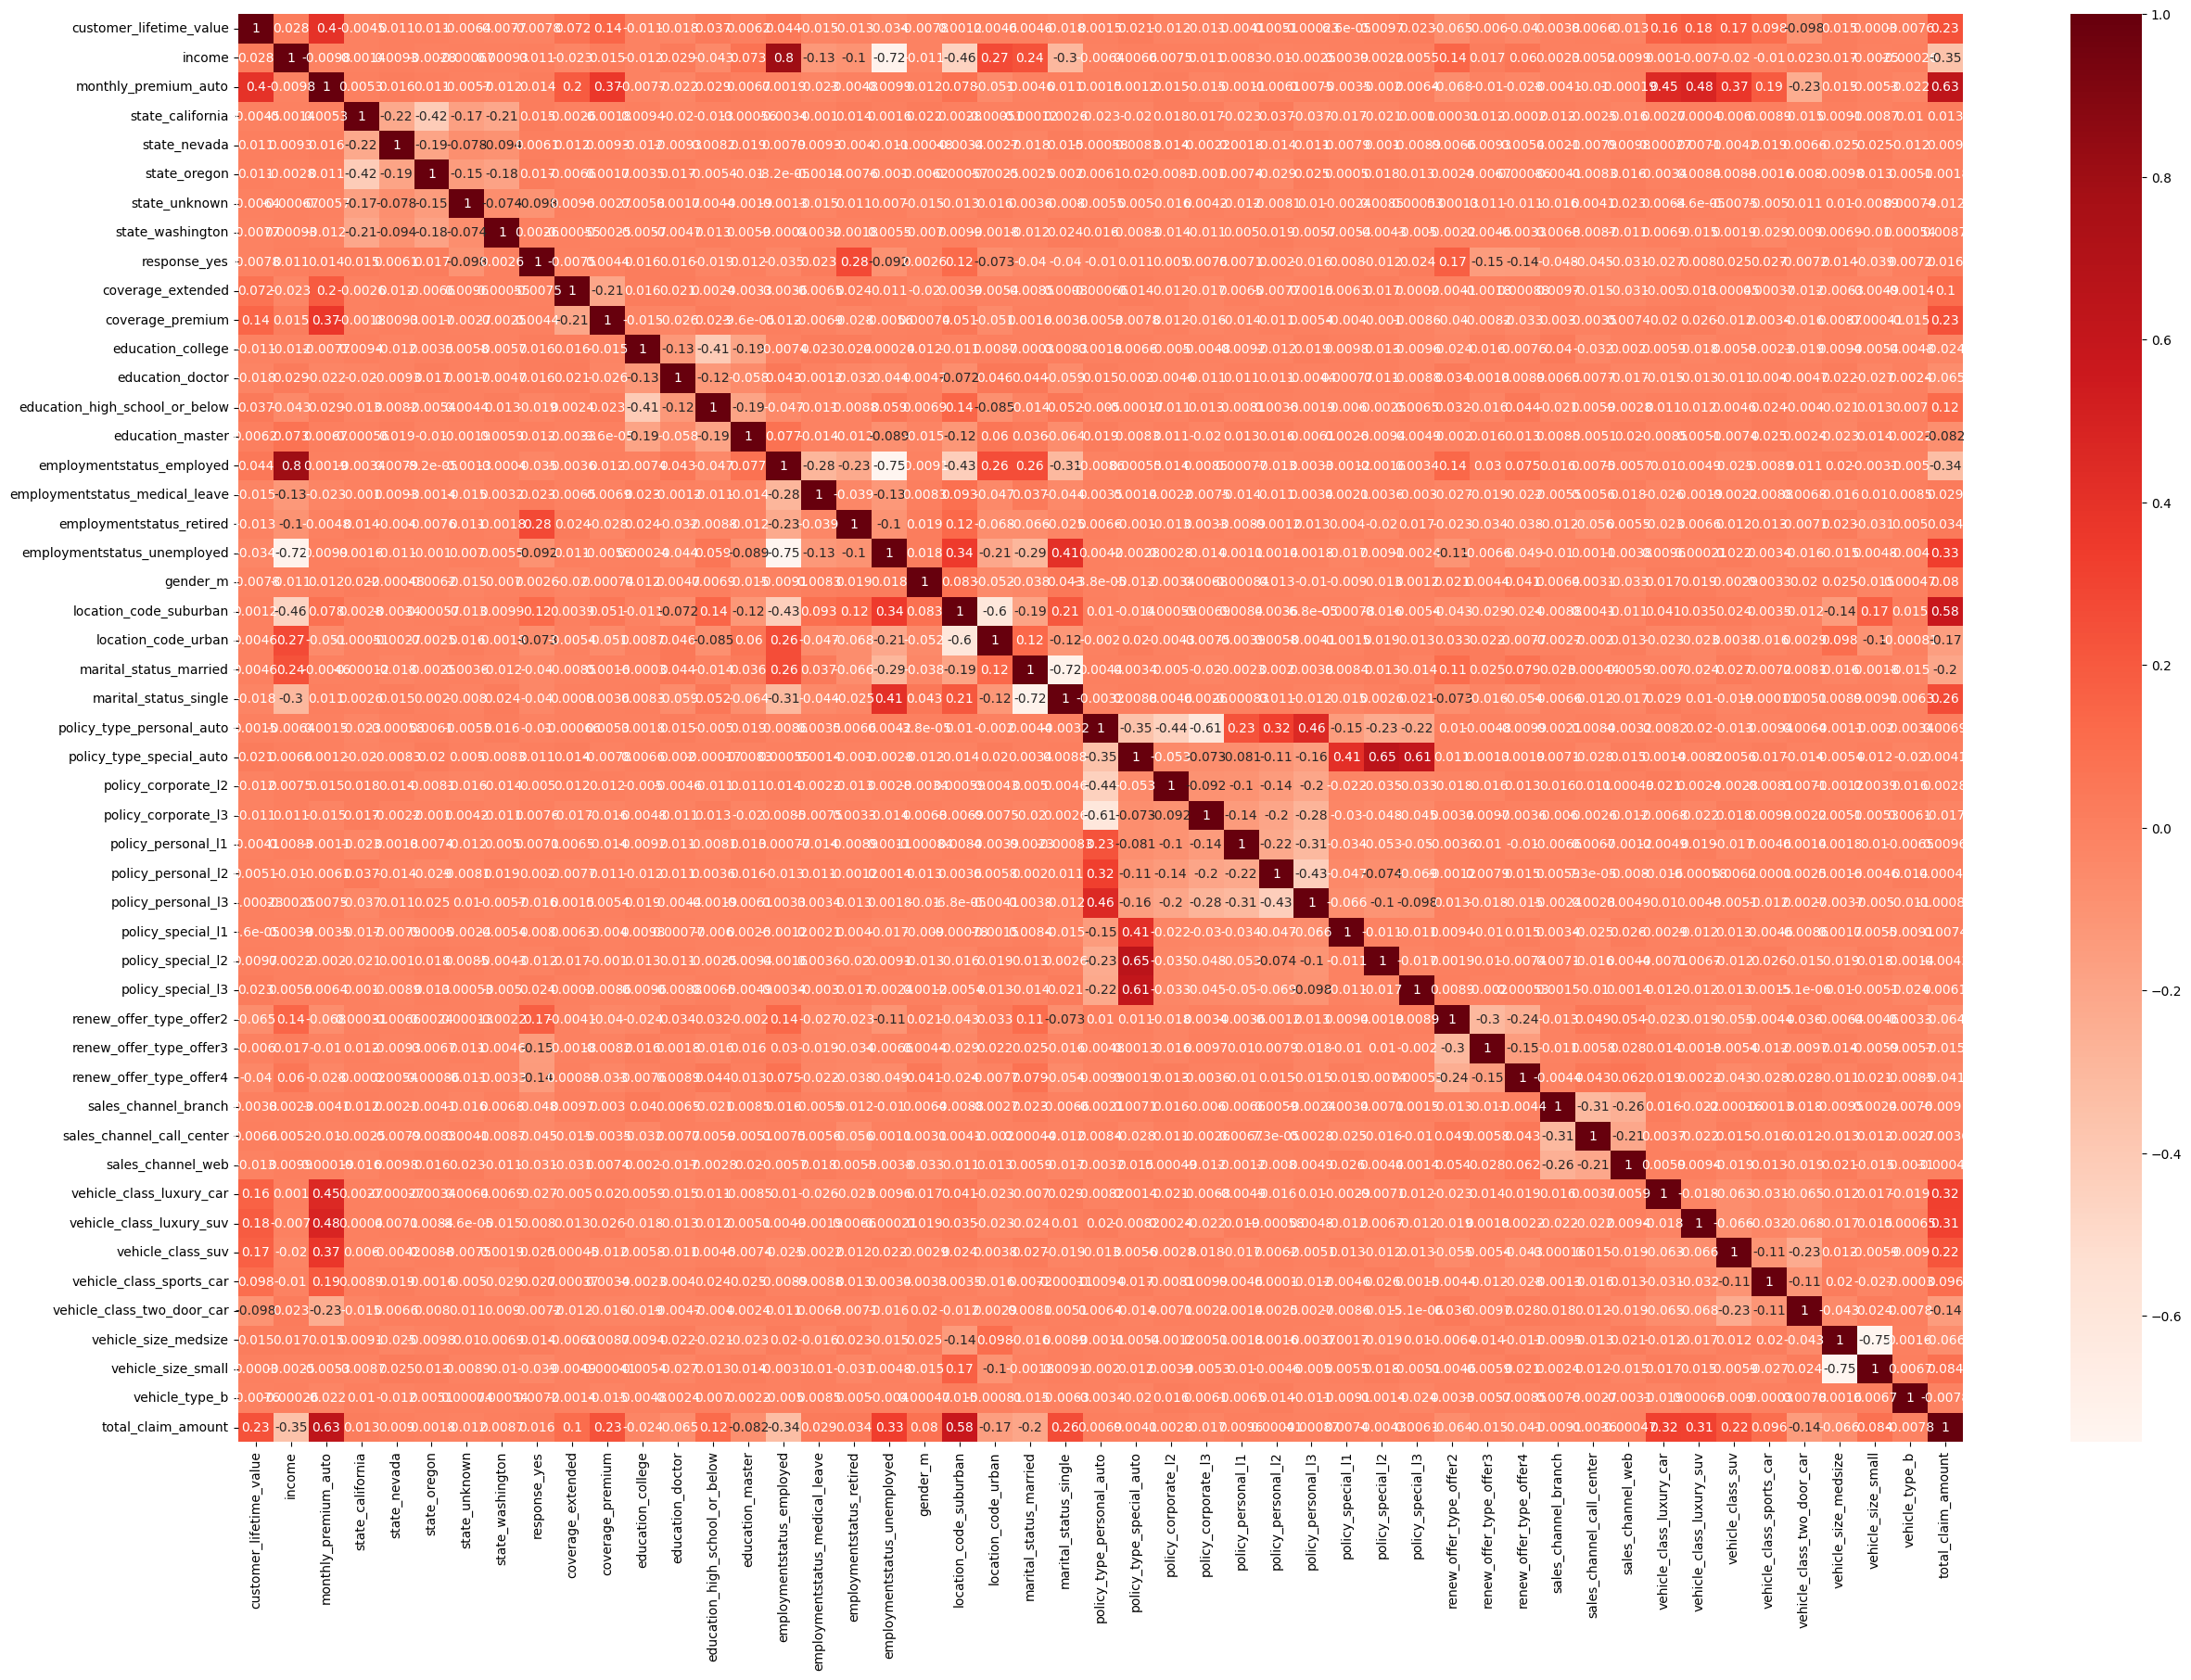

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

all = pd.concat((X2, y), axis=1)
mat = all.corr()
plt.figure(figsize=(30,20))
sns.heatmap(mat, annot=True, cmap='Reds')
plt.show()

# likely important after reviewing heatmap: 'Luxury Car', 'Luxury SUV', 'SUV', 'Premium', 'Small', 
#                                           'High School or Below', 'Unemployed', 'Suburban', 'Single'

In [172]:
# working with at least corr > ~0.2 columns

X3 = X2[[
    'customer_lifetime_value', 
    'income', 'monthly_premium_auto', 
    'vehicle_class_luxury_car', 'vehicle_class_luxury_suv', 
    'vehicle_class_suv', 'coverage_premium', 'vehicle_size_small', 
    'education_high_school_or_below', 'employmentstatus_unemployed', 'location_code_suburban', 'marital_status_single']]
fit_and_try(X3)

r2  : 0.7172004701183012
mse  : 22834.075344896202
rmse  : 151.1094813203202
mae  : 109.60843251064311


In [173]:
# working with standardized vals

X4 = pd.concat((nums_s, onehot_encoded_cats), axis=1)
fit_and_try(X4)    # sliiiiiiiiiiighty less r2 than with minmax

r2  : 0.7688892281128035
mse  : 18660.571255181836
rmse  : 136.60370146954963
mae  : 95.36960609129113


In [174]:
#only taking the low correlation numericals haahahahaha

X5 = X[['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]
fit_and_try(X5) 

r2  : 0.0007329400953758336
mse  : 80683.79514308278
rmse  : 284.04893089586307
mae  : 206.77500401150849


In [175]:
# combining standardized and undcorrelated numericals

X6 = X4.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1)
fit_and_try(X6)

r2  : 0.7689936640661409
mse  : 18652.138785622148
rmse  : 136.5728332635087
mae  : 95.43436047097747


In [176]:
# last try: working with log-transforming instead of normalizing

def log_transform_NAN(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [177]:
# flling with zeros

X7 = nums[['customer_lifetime_value', 'income', 'monthly_premium_auto']].copy()
#X7 = pd.concat((X7, X2[['Luxury Car', 'Luxury SUV', 'SUV', 'Premium', 'Small', 'High School or Below', 'Unemployed', 'Suburban', 'Single']]), axis=1)

X7['customer_lifetime_value'] = list(map(log_transform_NAN, X7['customer_lifetime_value']))
X7['customer_lifetime_value'] = X7['customer_lifetime_value'].fillna(0)

X7['income'] = list(map(log_transform_NAN, X7['income']))
X7['income'] = X7['income'].fillna(0)

X7['monthly_premium_auto'] = list(map(log_transform_NAN, X7['monthly_premium_auto']))
X7['monthly_premium_auto'] = X7['monthly_premium_auto'].fillna(0)

/tmp/ipykernel_93079/3669112823.py:4: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [178]:
# filling with mean

X8 = nums[['customer_lifetime_value', 'income', 'monthly_premium_auto']].copy()
#X8 = pd.concat((X8, X2[['Luxury Car', 'Luxury SUV', 'SUV', 'Premium', 'Small', 'High School or Below', 'Unemployed', 'Suburban', 'Single']]), axis=1)

X8['customer_lifetime_value'] = list(map(log_transform_NAN, X8['customer_lifetime_value']))
X8['customer_lifetime_value'] = X8['customer_lifetime_value'].fillna(np.mean(X8['customer_lifetime_value']))

X8['income'] = list(map(log_transform_NAN, X8['income']))
X8['income'] = X8['income'].fillna(np.mean(X8['income']))

X8['monthly_premium_auto'] = list(map(log_transform_NAN, X8['monthly_premium_auto']))
X8['monthly_premium_auto'] = X8['monthly_premium_auto'].fillna(np.mean(X8['monthly_premium_auto']))

/tmp/ipykernel_93079/3669112823.py:4: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [179]:
fit_and_try(X7)

r2  : 0.49434031261983735
mse  : 40828.467449522825
rmse  : 202.06055391768783
mae  : 147.8373258511864


In [180]:
fit_and_try(X8)                                             ##### no difference

r2  : 0.3853574008477646
mse  : 49628.071960006586
rmse  : 222.77358900912512
mae  : 157.1270102154138


In [181]:
fit_and_try(X2)

r2  : 0.768995581486197
mse  : 18651.98396742267
rmse  : 136.57226646513072
mae  : 95.43509091183873


In [182]:
fit_and_try(X2, t_size=0.1)             # best result yet

r2  : 0.7729727835722731
mse  : 17958.588479924187
rmse  : 134.00965815911997
mae  : 94.57068676119057


In [183]:
fit_and_try(X2, t_size=0.4)            # bigger r2 than size=0.1 but bigger errors too 

r2  : 0.7746377290313863
mse  : 18678.322730953114
rmse  : 136.6686603832536
mae  : 95.3279105659806


In [184]:
# dropping outliers

# create new dataframe containing 'best' filtered elements and target
data9 = pd.concat((X2.copy(), y), axis=1)
data9.describe().T.head(3)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,-1.341630e-16,1.000046,-0.888953,-0.581543,-0.326386,0.141550,10.938228
income,10910.0,5.340468e-17,1.000046,-1.236462,-1.236462,-0.122630,0.814106,2.056958
monthly_premium_auto,10910.0,1.015991e-16,1.000046,-0.934819,-0.731573,-0.296045,0.458871,5.946524


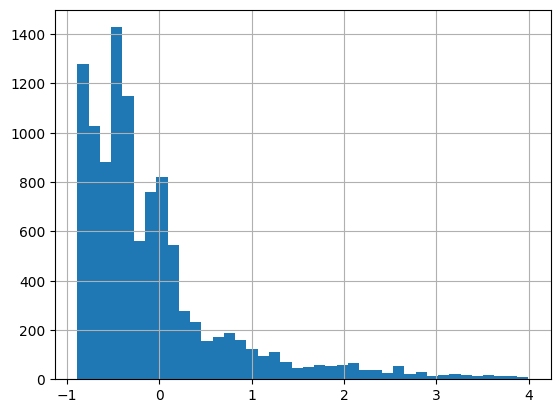

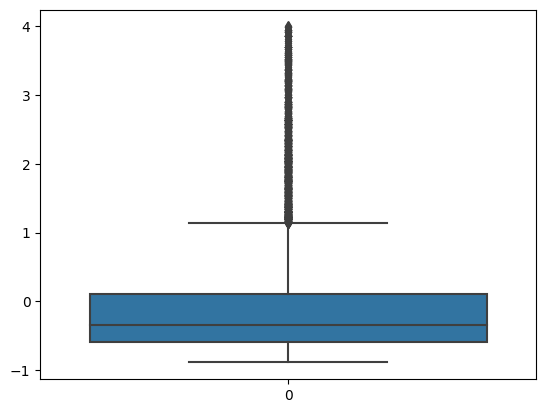

In [195]:
# looking at distributions

data9['customer_lifetime_value'].hist(bins=40)
plt.show()
sns.boxplot(data9['customer_lifetime_value'])
plt.show()

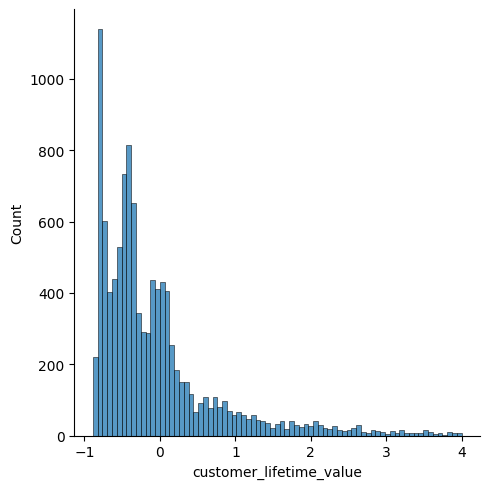

In [186]:
# filtering 

iqr = np.percentile(data9['customer_lifetime_value'],75) - np.percentile(data9['customer_lifetime_value'],25)
up = np.percentile(data9['customer_lifetime_value'],75) + 3 * iqr  
up = 4             
lo = np.percentile(data9['customer_lifetime_value'],25) - 1.5 * iqr         
data9 = data9[(data9['customer_lifetime_value']>lo) & (data9['customer_lifetime_value']<up)].copy()
sns.displot(data9['customer_lifetime_value'])
plt.show()

/tmp/ipykernel_93079/3840900781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data9['income'], bins=40)


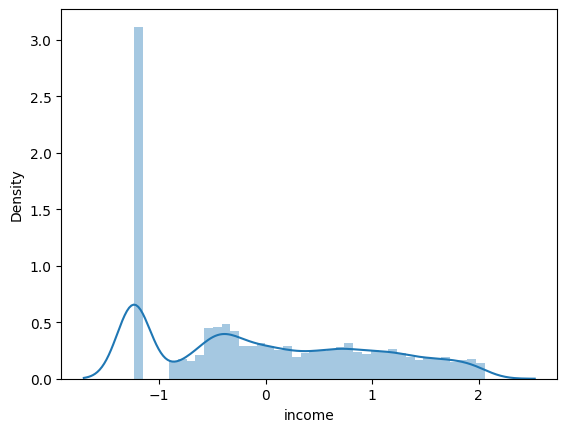

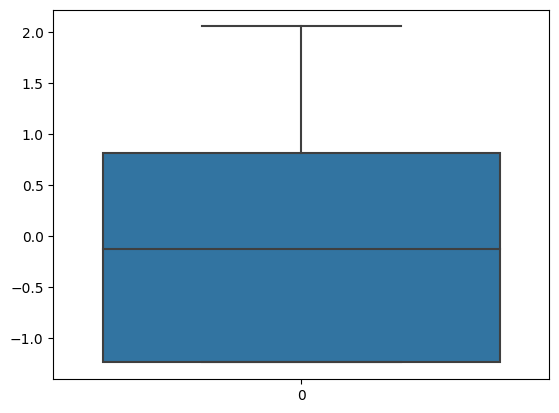

In [197]:
sns.distplot(data9['income'], bins=40)
plt.show()
sns.boxplot(data9['income'])
plt.show()

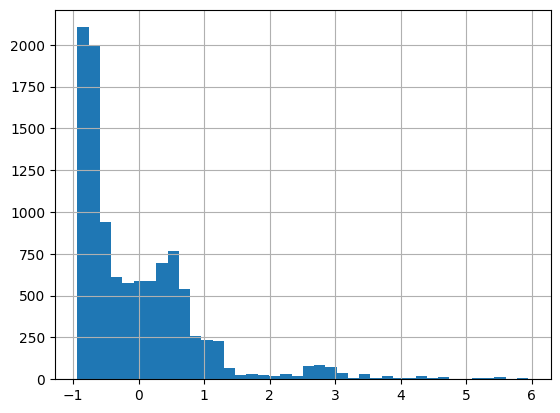

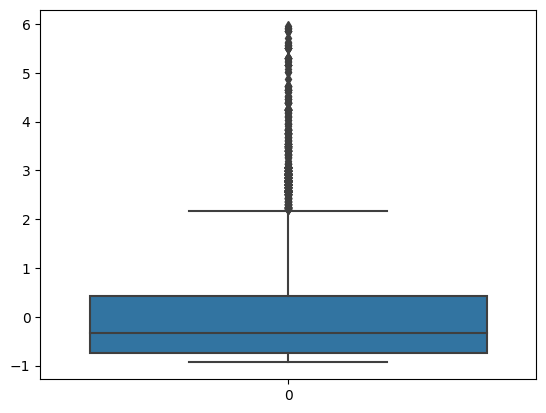

In [187]:
data9['monthly_premium_auto'].hist(bins=40)
plt.show()
sns.boxplot(data9['monthly_premium_auto'])
plt.show()

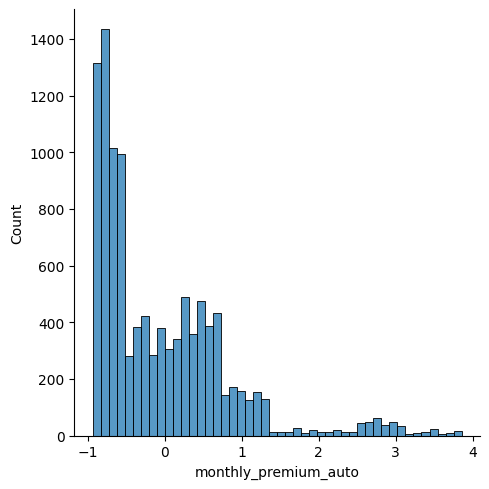

In [188]:
iqr = np.percentile(data9['monthly_premium_auto'],75) - np.percentile(data9['monthly_premium_auto'],25)
up = np.percentile(data9['monthly_premium_auto'],75) + 3 * iqr  
# up = 4             
lo = np.percentile(data9['monthly_premium_auto'],25) - 1.5 * iqr         
data9 = data9[(data9['monthly_premium_auto']>lo) & (data9['monthly_premium_auto']<up)].copy()
sns.displot(data9['monthly_premium_auto'])
plt.show()

In [189]:
data9.describe().T.head(3)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10693.0,-0.071227,0.809182,-0.888953,-0.588958,-0.339909,0.101802,3.997174
income,10693.0,-0.000963,1.002044,-1.236462,-1.236462,-0.124821,0.817869,2.056958
monthly_premium_auto,10693.0,-0.062335,0.867178,-0.934819,-0.731573,-0.325080,0.429835,3.855989


In [193]:
y9 = data9['total_claim_amount']
X9 = data9.drop(['total_claim_amount'], axis=1)
fit_and_try(X9, y9)

r2  : 0.7524154466875612
mse  : 18897.886837991442
rmse  : 137.46958513791856
mae  : 94.2005265806646


#### hard to improve initial model, there are some options that had a small positive influence on r2 and the errors:
- changing the train test split
- leaving out numerical columns with low corr to y